In [1]:
# import numpy and exp mat
import os
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

In [2]:
# import numpy and exp mat
import os
import numpy as np
import matplotlib.pyplot as plt

from module.QuantumSystem import SHOscillator
from module.Walker import MetropolisWalker
from module.Utils import VMC

np.random.seed(0)

# Spherical Harmonic Oscillator with interaction, with Metropolis and analytical hamiltonian
In this notebook we study the Spherical Harmonic Oscillator with HC interaction, using the Metropolis algorithm and analytical hamiltonian.

## Example 
VMC evaluation of a parameter alpha = 0.6

In [3]:
params = np.array([0.6])
warmup_steps = 5000
calibrate_steps = 5000
batch_steps = 100
run_steps = 80000

N = 5
D = 3

system = SHOscillator(N, D, params, a_HS=0.001)
walker = MetropolisWalker(system)
vmc = VMC(system, walker, params, 
          warmup_steps, run_steps, 
          calibrate_steps, batch_steps=batch_steps, acceptance_rate=0.5,
          block_quantiles=0.8, plot=True, verbose=True)

-----------------
VMC calibrate
-----------------
delta: 0.6938893903907228
subgroup_size: 1
Acceptance rate: 0.36
-----------------
VMC warmup
-----------------
Parameters: [0.6]
Acceptance rate: 0.4094


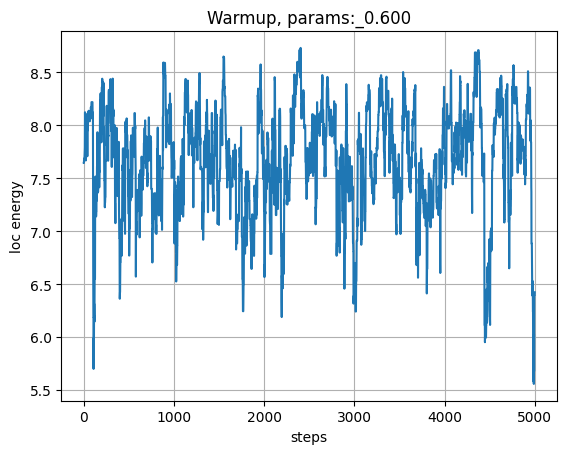

-----------------
VMC run
-----------------
Parameters: [0.6]
Acceptance rate: 0.42015
Time:  1.489184856414795
Energy: 7.62883301467946 +/- 0.014539773236680818


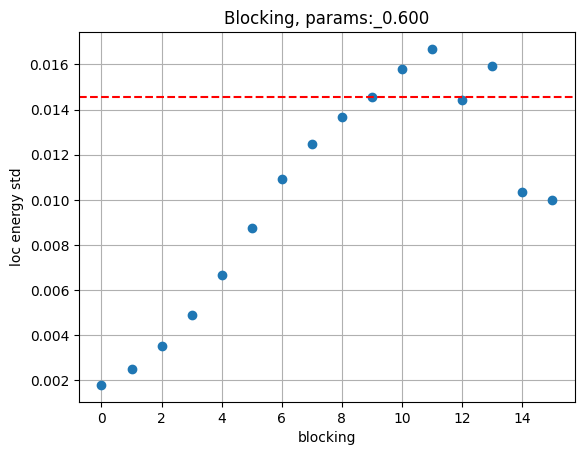

In [4]:
# warmup
vmc.calibrate()
vmc.warmup()
vmc.run()

## Compare with analytical results
Compare the results  with the analytical ground state energy of non interactive case:

In [8]:
print('MC mean energy:', vmc.get_energy(), '+-', vmc.get_energy_std())  
print('Analytical energy:', 0.5*N*D, '+-', 0.0)

MC mean energy: 77.23501837665512 +- 0.14010921044328278
Analytical energy: 75.0 +- 0.0


## Grid search
We perform a grid search of $\alpha$ for fixed N and D.
In particular we save the mean energy, the std of the mean energy and the time of execution for each $\alpha$ then we plot the results.

During a grid search warmup plot of the energies and the blocking plot are saved in a directory, so one can always check if the results are rasonable.

In [3]:
plot_dir = 'results/GridSearchN100/'

In [15]:
params = np.linspace(0.42, 0.5, 5)
energies = np.zeros(len(params))
energies_std = np.zeros(len(params))
times = np.zeros(len(params))

plot_dir = 'results/GridSearchN100/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

system = SHOscillator(N, D)
walker = MetropolisWalker(system)
vmc = VMC(system, walker, params, 
          warmup_steps=warmup_steps, run_steps=run_steps,
          calibrate_steps=calibrate_steps, batch_steps=batch_steps, acceptance_rate=0.5,
          verbose=True, plot=False, plot_dir=plot_dir)

for i, param in enumerate(params):
    vmc.set_params(np.array([param]))
    vmc.calibrate()
    vmc.warmup()
    vmc.run()
    energies[i] = vmc.get_energy()
    energies_std[i] = vmc.get_energy_std()
    times[i] = vmc.get_run_time()

    np.save(plot_dir+'energies.npy', energies)
    np.save(plot_dir+'energies_std.npy', energies_std)
    np.save(plot_dir+'times.npy', times)

-----------------
VMC calibrate
-----------------
delta: 0.059604644775390625
subgroup_size: 100
Acceptance rate: 0.49
-----------------
VMC warmup
-----------------
Parameters: [0.42]
Acceptance rate: 0.5346
-----------------
VMC run
-----------------
Parameters: [0.42]
Acceptance rate: 0.529825
Time:  3691.982490539551
Energy: 182.5956869865857 +/- 0.12254861051351947
-----------------
VMC calibrate
-----------------
delta: 0.07450580596923828
subgroup_size: 48
Acceptance rate: 0.41
-----------------
VMC warmup
-----------------
Parameters: [0.44]
Acceptance rate: 0.5698
-----------------
VMC run
-----------------
Parameters: [0.44]
Acceptance rate: 0.5808125
Time:  4047.2878437042236
Energy: 181.59099972946052 +/- 0.10292312723093706
-----------------
VMC calibrate
-----------------
delta: 0.07450580596923828
subgroup_size: 60
Acceptance rate: 0.63
-----------------
VMC warmup
-----------------
Parameters: [0.46]
Acceptance rate: 0.5218
-----------------
VMC run
-----------------
Pa

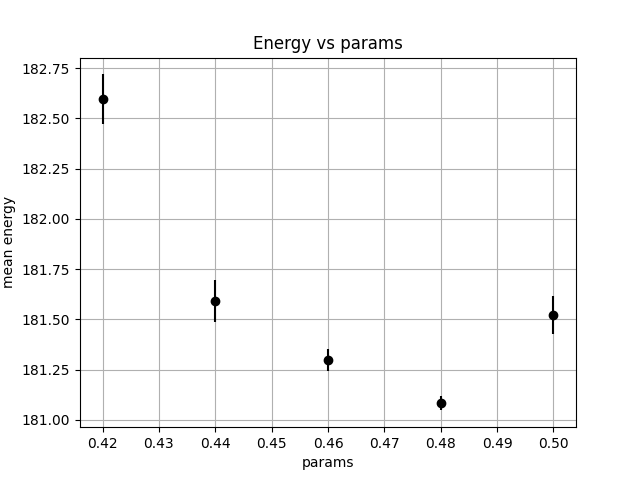

In [32]:
# plot the results
%matplotlib widget
plt.figure()
plt.errorbar(params, energies, yerr=energies_std, fmt='o', color='k')
plt.xlabel('params')
plt.ylabel('mean energy')
plt.title('Energy vs params')
plt.grid()
plt.savefig(plot_dir+'Energy_vs_params.png')

In [33]:
# save the run_chain in results/GridSearchN100/run_chain.npy
# save the energies in results/GridSearchN100/energies.npy

np.save(plot_dir+'run_chain.npy', vmc.run_chain)
run_energies = vmc.run_analizer.get_local_energies()
np.save(plot_dir+'run_energies.npy', energies)